In [1]:
from linares_plot import *
import scipy.io as io
import pickle


In [2]:
import os
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\distractor_neurons\\Christos_first_second\\brian_simulations'

In [36]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulation_30000.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

In [37]:
# data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulation_10000.mat') #,{'rate':rates, 'spktm': spikes.it})
# spikes = data['spktm']

In [38]:
spikes[1] ## todos los tiempos donde ha habido un spike
spikes[0] ## la neurona correspondiente que ha hecho el spike

array([  229.,   275.,   419., ..., 10082., 16627.,  9301.])

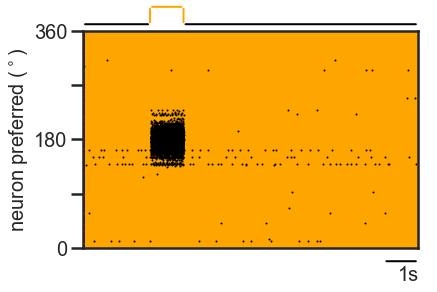

In [39]:
N0 = 30000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);


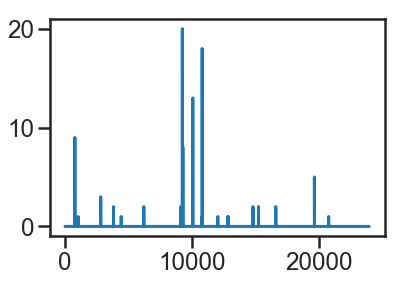

In [40]:
### Rate de todas las neuronas durante el delay
plt.plot(data['rate'][0])

In [62]:
## aquí tienes los spiketimes da cada una d elas neuronas

dict_spiketimes = pickle.load( open( "C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\dict_spiketimes.pkl", "rb" ), 
                              encoding='latin1' )

dict_spiketimes

### Multiple simulations (paralel)

In [34]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\results_simulations.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes_all = data['spktm']

### Just plot the first
n_sim=1 #0,1,2,....
spikes = [spikes_all[n_sim][0][0], spikes_all[n_sim][1][0]]

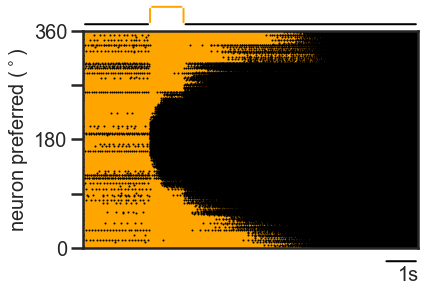

In [35]:
N0 = 1000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);


## Plot single simulation

In [46]:
data = io.loadmat('C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\single_simulation_ext2.mat') #,{'rate':rates, 'spktm': spikes.it})
spikes = data['spktm']

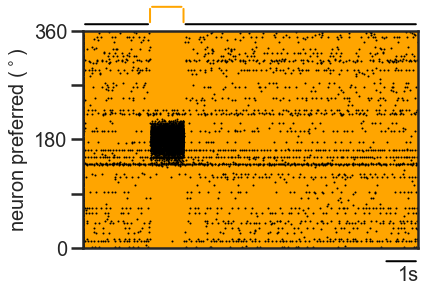

In [48]:
N0 = 30000
time_s =10
N=0.8*N0 #(el 80% son excitadoras)
stim_on=2
stim_off=3


stim_on/time_s

fig, ax = plt.subplots()
ax.plot(spikes[1],spikes[0], '.', markersize=2, color='black')
ax.set_facecolor("orange")
plt.xlim(0,time_s)
plt.ylim(0,N)

# ax = fig.add_subplot(1, 1, 1)
inf=1.03
sup=1.11
ax.annotate('', xy=(0, inf), xycoords='axes fraction', xytext=(stim_on/time_s, inf), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('', xy=(stim_on/time_s, inf), xycoords='axes fraction', xytext=(stim_on/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_on/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, sup), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, sup), xycoords='axes fraction', xytext=(stim_off/time_s, inf), arrowprops=dict(arrowstyle="-", color='orange'))
ax.annotate('', xy=(stim_off/time_s, inf), xycoords='axes fraction', xytext=(1, inf), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('', xy=(1-1/time_s, -.06), xycoords='axes fraction', xytext=(1, -.06), arrowprops=dict(arrowstyle="-", color='black'))
plt.text(time_s-0.6, -0.15*N, '1s', fontsize=20) ##en función de time_s y N
plt.gca().set_xticks([])
plt.gca().set_xticklabels([])

plt.gca().set_yticks([0, int(N/4), int(N/2),  int(3*N/4), int(N) ])
plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)
plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);

In [45]:
list(np.linspace(0,2,10))

[0.0,
 0.2222222222222222,
 0.4444444444444444,
 0.6666666666666666,
 0.8888888888888888,
 1.1111111111111112,
 1.3333333333333333,
 1.5555555555555554,
 1.7777777777777777,
 2.0]